# Predicting mileage of a car in City

By: Nipun Soni

In this file, I will be demonstrating an end-to-end machine learning project on **Automobile dataset**. I have taken data from [UCI Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

I will start from loading data from the repository into pandas dataframe. Then, I will perform basic data cleaning and exploratory data analysis to study the characterstics of dataset. Finally, I will scale the features, split it into test and train datasets and perform a multiple linear regression to predict the mileage of a vehicle in city based on various predictors.


## 1. Load Data

Here, I am loading data directly from UCI repository link. **Data has 26 features and 205 observations.**

In [736]:
#necessary imports - numpy, pandas, seaborn, matplotlib, sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

**Data is loaded into pandas dataframe using read_csv function. After loading data into dataframe, I am assigning names to each column and peeking into data using head function.**

In [737]:
df_auto_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', sep=",", header=None)
df_auto_data.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df_auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Columns **symboling** and **normalized-losses** are not relevant so I am dropping these two columns from the dataframe

In [738]:
df_auto_data.drop(['symboling','normalized-losses'], axis=1, inplace=True)
df_auto_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. Getting to know more about data 

We have 24 features in our dataset. In this section, I am trying to know more about these features by using shape, describe and info functions of pandas dataframe.

In [739]:
#getting shape of data
df_auto_data.shape

(205, 24)

In [740]:
# Descriptive statistics of numeric columns
df_auto_data.describe()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [741]:
# information about column datatypes
df_auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-nu

**The datatype of some of the numeric columns is 'Object' instead of int/ int64/ float. This is addressed in the next section.**

## 3. Data Cleaning

### Why some columns are of type 'Object'?
**While importing data from a source, if the values are inconsistent in a particular feature, pandas will consider it Object by default.**

In automobile dataset, features **horsepower, num-of-doors, bore, stroke** and **price** have junk value ('?') which is why these columns are of type Object.

This can be fixed using **mean imputation technique**. Below are the steps to do so:
1. Substitue 0 in place of '?'
2. Change datatype to int/ float
3. Substitute 0 by mean value of the column

**Note:** Above steps will not work if the column has a value 0 for any observation.

For column **num-of-doors**, I have substituted 'four' instead of '?'. Reason - the two records that have '?' value for num-of-doors column have body-style as sedan. A Sedan generally has four doors.

In [742]:
#Getting unique values of horsepower to check for junk values
df_auto_data.horsepower.unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

**Replacing '?' with mean value of horsepower**

In [743]:
#Get index of rows having ?
df_auto_data[df_auto_data['horsepower'] == '?']

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [744]:
#replace ? with 0
df_auto_data.at[130,'horsepower'], df_auto_data.at[131,'horsepower'] = 0, 0
#change datatype to int
df_auto_data.horsepower = df_auto_data.horsepower.astype('int')

#calculate mean of horsepower column
horsepower_mean = df_auto_data.horsepower.mean()
#impute 0 with mean value
df_auto_data.at[130,'horsepower'], df_auto_data.at[131,'horsepower'] = horsepower_mean, horsepower_mean
#descriptive statistics of horsepower column
df_auto_data.horsepower.describe()

count    205.000000
mean     104.243902
std       39.519405
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [745]:
#Get unique values of num-of-doors
df_auto_data['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [746]:
#Get index of rows having num-of-doors '?'
df_auto_data[df_auto_data['num-of-doors'] == '?'] #index no. 27, 63

#replace values by 'four'
df_auto_data.at[27,'num-of-doors'], df_auto_data.at[63,'num-of-doors'] = 'four', 'four'

In [747]:
#Get unique values of bore
df_auto_data['bore'].unique()
#Get rows having bore as '?'
df_auto_data[df_auto_data['bore'] == '?']

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [748]:
#Get unique values of bore
df_auto_data['stroke'].unique()
#Get rows having stroke as '?'
df_auto_data[df_auto_data['stroke'] == '?']

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [749]:
#bore and stroke have missing values at same row indexes
#setting values of bore and stroke as 0
df_auto_data.iloc[55:59, 16:18] = 0

#change datatypes of bore and stroke columns to int
df_auto_data.bore = df_auto_data.bore.astype('float')
df_auto_data.stroke = df_auto_data.stroke.astype('float')

In [750]:
#replace bore values by mean
df_auto_data.iloc[55:59, 16] = df_auto_data.bore.mean()

#replace stroke values by mean
df_auto_data.iloc[55:59, 17] = df_auto_data.stroke.mean()

In [751]:
#Get index of rows having price as '?'
df_auto_data[df_auto_data['price'] == '?']

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [752]:
#replace ? with 0 in price columns
#index no. 9, 44, 45, 129
df_auto_data.at[9,'price'], df_auto_data.at[44,'price'], df_auto_data.at[45,'price'], df_auto_data.at[129,'price'] = 0, 0, 0, 0

#change datatype to int64
df_auto_data.price = df_auto_data.price.astype('int64')

#get the mean of price column
mean_price = df_auto_data.price.mean()

#impute 0 in price column by mean
df_auto_data.at[9,'price'], df_auto_data.at[44,'price'], df_auto_data.at[45,'price'], df_auto_data.at[129,'price'] = mean_price, mean_price, mean_price, mean_price

#get descriptive statistics of price column
df_auto_data.price.describe()

count      205.000000
mean     13202.092683
std       7868.849609
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

#### Removing outliers from city-mpg feature

In [753]:
#Removing outliers
df_auto_data['city-mpg'].max()
df_auto_data.sort_values(by='city-mpg',ascending=False ).head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479
18,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
90,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
45,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,12949
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399


In [754]:
#removing outliers based on city-mpg values
df_auto_data.drop(df_auto_data[df_auto_data['city-mpg'] > 45].index, inplace=True)

**Changing datatype of peak-rpm to int64**

In [755]:
#get index of rows having peak-rpm = '?'
df_auto_data[df_auto_data['peak-rpm'] == '?'] # index 130, 131

#set value to 0
df_auto_data.at[130,'peak-rpm'], df_auto_data.at[131,'peak-rpm'] = 0, 0

#change datatype to int64
df_auto_data['peak-rpm'] = df_auto_data['peak-rpm'].astype('int64')

#calculate mean
mean_rpm = df_auto_data['peak-rpm'].mean()
#impute with mean
df_auto_data.at[130,'peak-rpm'], df_auto_data.at[131,'peak-rpm'] = mean_rpm, mean_rpm

In [756]:
df_auto_data['peak-rpm'] .unique()

array([5000, 5500, 5800, 4250, 5400, 6000, 4800, 4750, 4650, 4200, 4350,
       4500, 5200, 4150, 5600, 5900, 5750, 5076, 5250, 4900, 4400, 6600,
       5100, 5300], dtype=int64)

**Descriptive statistics after data cleaning**

In [673]:
df_auto_data.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,98.867488,174.356650,65.945320,53.741872,2564.975369,127.403941,3.332607,3.254520,10.148374,104.748768,5126.610837,24.995074,30.527094,13274.871921
std,5.945239,11.998036,2.114335,2.446612,514.340965,41.515050,0.269098,0.314684,3.991213,39.379481,478.807824,6.166419,6.535736,7872.856832
min,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.150000,52.000000,2179.500000,98.000000,3.150000,3.110000,8.550000,70.000000,4800.000000,19.000000,25.000000,7847.000000
50%,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10698.000000
75%,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,45.000000,50.000000,45400.000000


In [674]:
#Exploring body-style column (categorical)
df_auto_data['body-style'].value_counts()

sedan          96
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

## 4. Data Exploration

In this section, I have created plots for **exploratory data analysis** of the Automobile data. I am using seaborn package for visualizing the dataset.

Plots used - **Boxplot, Barplot, Countplot, Regplot, Heatmap, Pairplot and Heatmap**

**i. Relation between drive-wheels and highway-mpg**

Box plot is a way to visualize descriptive statistics. Here we can see that fwd vehicles have highest mean highway-mpg in both petrol and diesel categories

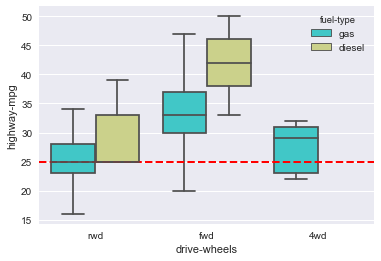

In [757]:
sns.boxplot(x='drive-wheels', y='highway-mpg', hue='fuel-type', data=df_auto_data, palette='rainbow')
plt.axhline(df_auto_data['city-mpg'].mean(),color='r',linestyle='dashed',linewidth=2)

**ii. Relation between body-style and peak-rpm**

We can see from below plot that vehicles running on gas have higher peak-rpm on an average

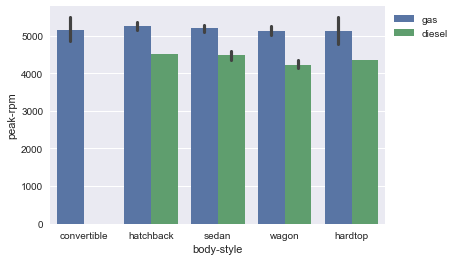

In [758]:
sns.barplot(x="body-style", y="peak-rpm", hue="fuel-type", data=df_auto_data)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

**iii. Count of car body-style**

Below plot represents count of each category of car. The data has most number of records for sedan.

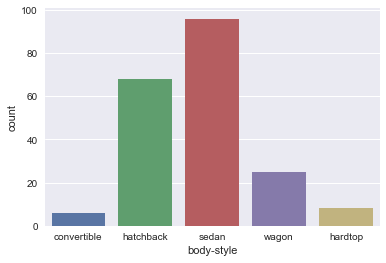

In [759]:
sns.countplot(x="body-style", data=df_auto_data)

**iv. Relation between city-mpg and horsepower**

Regression plot below shows that as the horsepower increases, city-mpg decreases

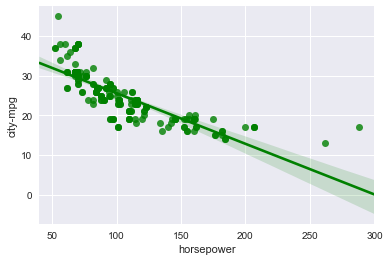

In [760]:
sns.regplot(x=df_auto_data["horsepower"], y=df_auto_data["city-mpg"], fit_reg=True, color='green')

**v. Relation between horsepower and engine-size**

Regression plot below indicates that as the engine-size increases, horsepower increases

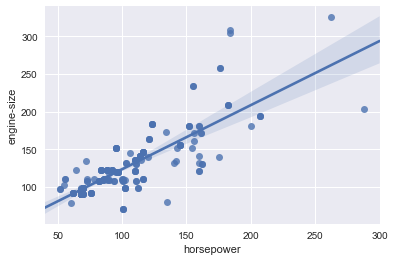

In [718]:
sns.regplot(x=df_auto_data["horsepower"], y=df_auto_data["engine-size"], fit_reg=True)

**vi. Correlation heat map for features**

Some of the inferences that can be made from below map are:
1. Size of engine and highway-mpg have a high negative correlation
2. Horsepower and engine size have high positive correlation
3. Horsepower and city and highway mpg have high negative correlation

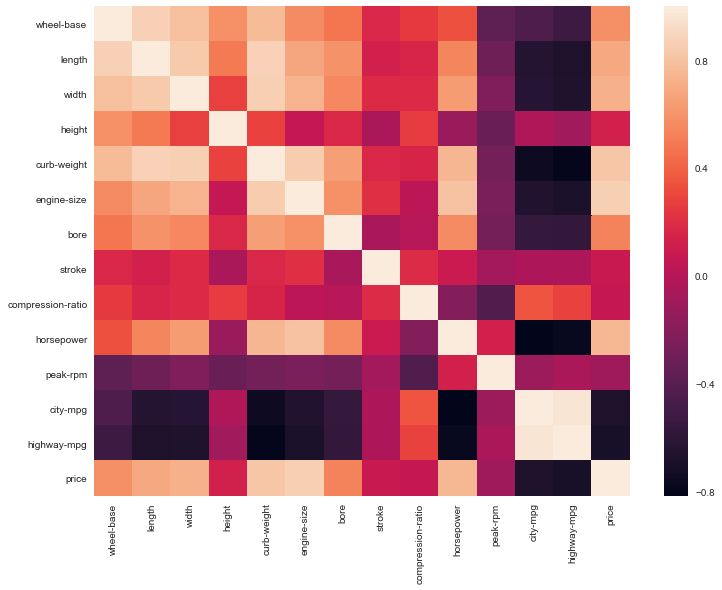

In [761]:
#plot correlation matrix
corr_mat = df_auto_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat);

**vii. Relation between various features using pairplot**

This is a grid of plots for quick exploratory analysis between various factors in a dataset.

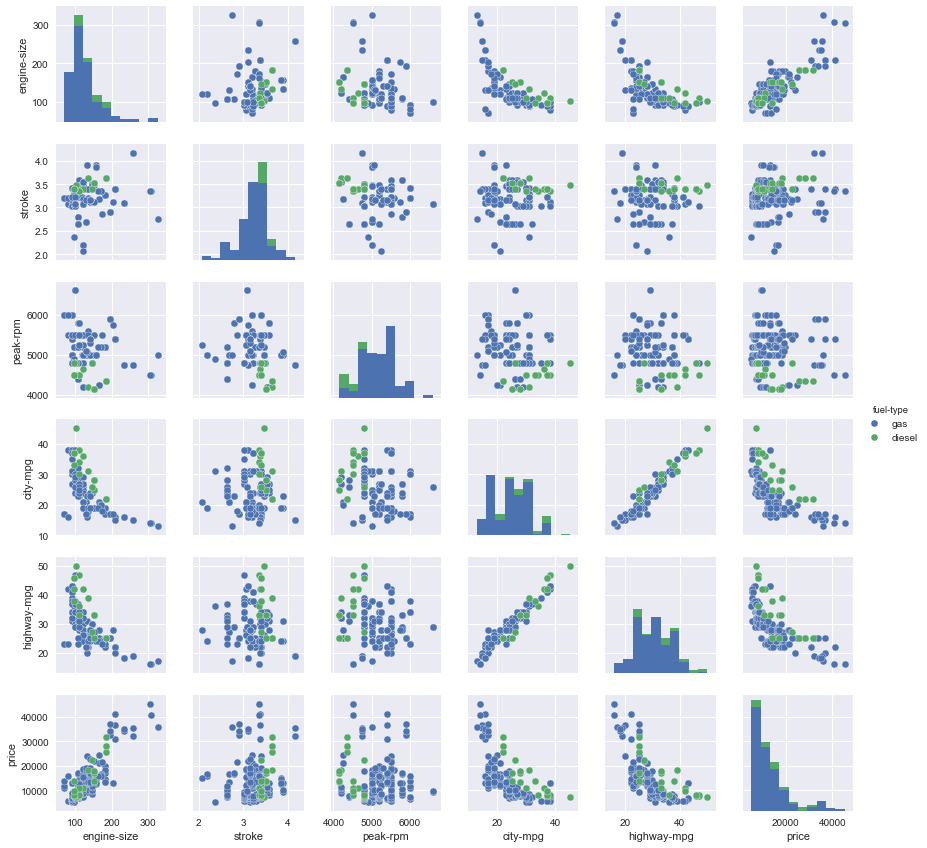

In [762]:
#shortlist features for pairplot
pairplot_columns = ['make','fuel-type', 'body-style','drive-wheels','engine-type','num-of-cylinders','engine-size','fuel-system','stroke','peak-rpm','city-mpg','highway-mpg','price']
sns.set()
sns.pairplot(df_auto_data[pairplot_columns], size = 2.0,hue ='fuel-type')
plt.show()

**viii. Distribution plot**

The plot gives an idea of distribution of data of a feature. I have created distribution plot for city-mpg. Data looks normally distributed here.

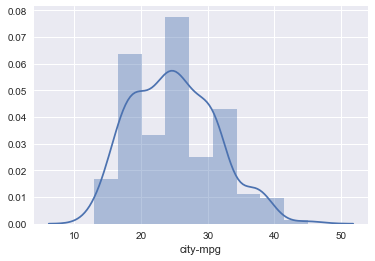

In [763]:
sns.distplot(df_auto_data['city-mpg'])

### 5. Feature Scaling

Normalizing values for correct predictions in multiple linear regression model

In [764]:
#make a copy of data
df_auto_data_scaled = df_auto_data.copy()

**Creating a function scale_values that will take a value and scale it between 0 and 1**

In [765]:
#create function
def scale_values(value):
    return (value-value.min())/(value.max()-value.min())

In [766]:
#scale column values from dataset
df_auto_data_copy['horsepower'] = scale_values(df_auto_data_copy['horsepower'])
df_auto_data_copy['peak-rpm'] = scale_values(df_auto_data_copy['peak-rpm'])
df_auto_data_copy['city-mpg'] = scale_values(df_auto_data_copy['city-mpg'])
df_auto_data_copy['highway-mpg'] = scale_values(df_auto_data_copy['highway-mpg'])
df_auto_data_copy['stroke'] = scale_values(df_auto_data_copy['stroke'])
df_auto_data_copy['engine-size'] = scale_values(df_auto_data_copy['engine-size'])
df_auto_data_copy['length'] = scale_values(df_auto_data_copy['length'])
df_auto_data_copy['width'] = scale_values(df_auto_data_copy['width'])
df_auto_data_copy['height'] = scale_values(df_auto_data_copy['height'])

In [768]:
#peek at scaled data
df_auto_data_copy.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.413433,0.324786,...,0.260377,mpfi,3.47,0.290476,9.0,0.294393,0.346939,0.222222,0.289474,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.413433,0.324786,...,0.260377,mpfi,3.47,0.290476,9.0,0.294393,0.346939,0.222222,0.289474,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.449254,0.444444,...,0.343396,mpfi,2.68,0.666667,9.0,0.495327,0.346939,0.166667,0.263158,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,0.529851,0.504274,...,0.181132,mpfi,3.19,0.633333,10.0,0.252336,0.551020,0.305556,0.368421,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,0.529851,0.521368,...,0.283019,mpfi,3.19,0.633333,8.0,0.313084,0.551020,0.138889,0.157895,17450


## 6. Training and Evaluating on the Training Set

I am using a multiple Linear Regression model here to predict city-mpg value based various predictor variables. Predictor variables are **horsepower, peak-rpm, stroke, length and engine-size.**

**Steps:**
1. Extract predictor variables and response variable in two different data frames from scaled dataset
2. Split into test and train datasets
3. Perform linear regression on training dataset
4. Check performance by running model on test dataset

In [769]:
#create a list of predictor variables
factors = ['horsepower', 'peak-rpm', 'stroke', 'length', 'engine-size']

#create dataframes for predictor and response variables using scaled dataset
X = pd.DataFrame(df_auto_data_scaled[factors].copy())
y = df_auto_data_scaled['city-mpg'].copy()

In [770]:
#Split data into train and test and check for data shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [771]:
#create a linear regression variable
regressor = LinearRegression()

In [772]:
#perform linear regression using train datasets of predictor and response variables
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [773]:
#store coefficients in a dataframe to check their values
lm_coeff = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
lm_coeff

,Coefficient
horsepower,-0.099037
peak-rpm,-0.001625
stroke,0.976308
length,-0.207297
engine-size,0.013120


#### Running model on test data

In [774]:
y_predicted = regressor.predict(X_test)

In [775]:
#store result in dataframe and compare
df_results = pd.DataFrame({'Actual Mileage':y_test,'Predicted Mileage':y_predicted})
df_results

,Actual Mileage,Predicted Mileage
122,31,29.090493
57,17,24.252790
8,17,17.293434
11,23,23.076836
29,19,22.469205
9,16,18.318493
106,19,19.272906
38,27,27.278011
174,30,28.774370
184,37,31.053350


### Model Evaluation using RMSE

Let's evaluate model using Root Mean Square Error

In [776]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.1228445614543756

#### City mileage ranges somewhere between 13 to 45 mpg. So, prediction error of 3.12 miles per gallon is good for start.

### Next Steps

We can funther fine tune the model using various techniques or try different models on this dataset to further decrease RMSE.

**Thank You!**